### Q1

In [76]:
import networkx as nx

edges_file = './airports/global-net.dat'
G = nx.read_edgelist(edges_file, nodetype=int, create_using=nx.Graph())

nodes_file = './airports/global-cities.dat'
node_names = {}
with open(nodes_file, 'r') as file:
    for line in file:
        parts = line.strip().split('|')
        node_id = int(parts[1])
        node_name = parts[2]
        node_names[node_id] = node_name
G = nx.relabel_nodes(G, node_names, copy=False)

num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(num_nodes)
print(num_edges)


3618
14142


In [77]:
nodes = set()
isolated_nodes = set()
node_file = './airports/global-net.dat'
with open(node_file, 'r') as file:
    for line in file:
        parts = line.strip().split(' ')
        nodes.add(int(parts[1]))

for i in range(3883):  
    if i not in nodes:
        isolated_nodes.add(i)


### Q2

In [79]:
connected_components = list(nx.connected_components(G))
largest_component = max(connected_components, key=len)
largest_subgraph = G.subgraph(largest_component)
num_nodes_largest = len(largest_component)
num_edges_largest = largest_subgraph.number_of_edges()

print(len(connected_components))
print(largest_component)
print(num_nodes_largest)
print(num_edges_largest)


1
{'Berbera', 'Antsohihy', 'Angers', 'Abakan', 'Jammu', 'Chios', 'Milingimbi', 'Jeremie', 'Manang', 'Angouleme', 'Rutland', 'Escanaba', 'Sheffield', 'Dzaoudzi', 'Kharkov', 'Penrhyn Island', 'Las Palmas', 'Soderhamn', 'Passo Fundo', 'Inuvik', 'Maupiti Island', 'Paso de Los Libres', 'Bhamo', 'Hickory', 'Lanai City', 'Jamestown (US) NY', 'Cruzeiro do Sul', 'Puerto Vallarta', 'Gode', 'Ceuta Heliport', 'Pietersburg', 'Aalborg', 'Barcaldine', 'Goa', 'Hue', 'Merced', 'Kyaukpyu', 'King Cove', 'Rio Mayo', 'Moroni', 'Praslin Island', 'Iles de la Madeleine', 'Jorhat', 'Mukah', 'Muscle Shoals', 'Uummannaq', 'Saskatoon', 'Pingtung', 'Davis Inlet', 'Monastir', 'Badajoz', 'Pelotas', 'Naukiti', 'North Caicos', 'Anguganak', 'Tiga', 'Hiroshima', 'Ballina', 'Taitung', 'Oklahoma City', 'Dalat', 'Stavanger', 'Blakely Island', 'Bima', 'Cedar Rapids', 'Sola', 'Norfolk (US) VA', 'Helena', 'Golfito', 'Ixtapa/zihuatanejo', 'Singapore', 'Hachijo Jima', 'Kuqa', 'Malaga', 'Catarman', 'Gewoya', 'Holguin', 'Pueblo',

### Q3

In [33]:
top_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:10]
top_nodes_info = [(node,degree) for node,degree in top_nodes]

print(top_nodes_info)

[('Paris', 250), ('London (GB)', 242), ('Frankfurt', 237), ('Amsterdam', 192), ('Moscow', 186), ('Chicago', 184), ('New York', 179), ('Atlanta', 172), ('Dallas/Fort Worth', 147), ('Houston', 144)]


### Q4

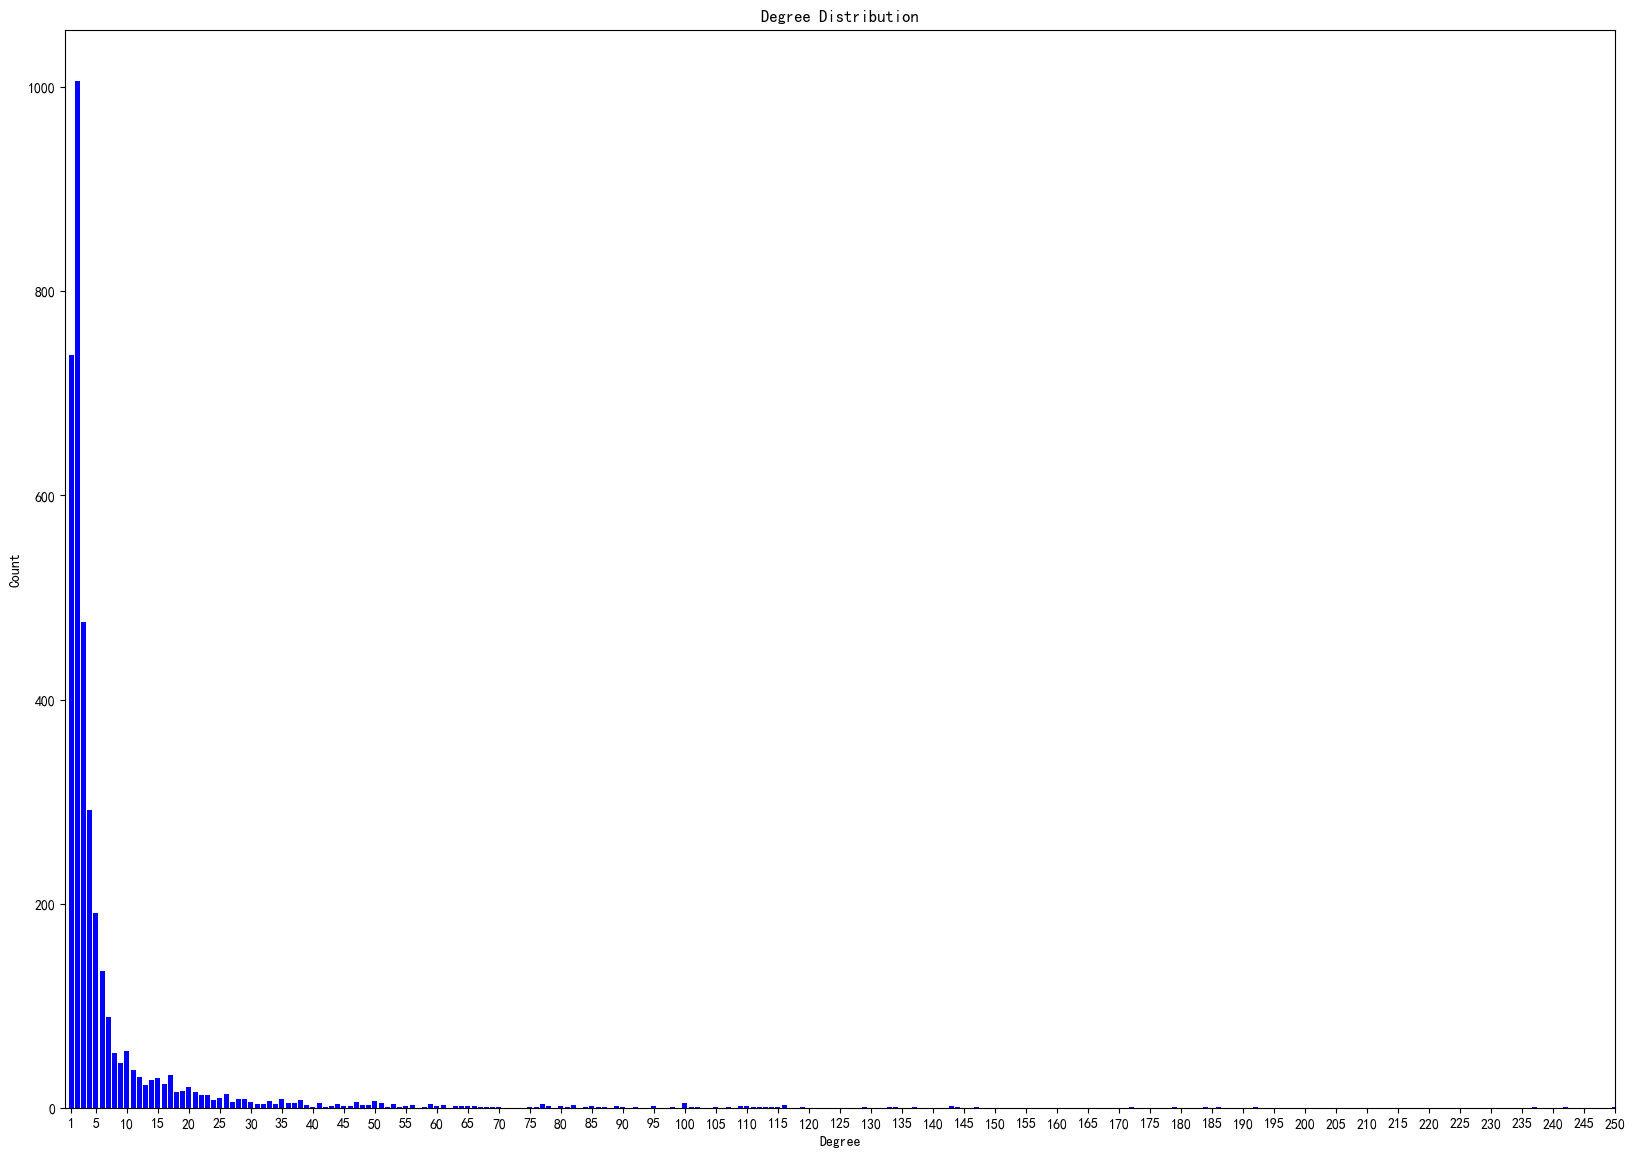

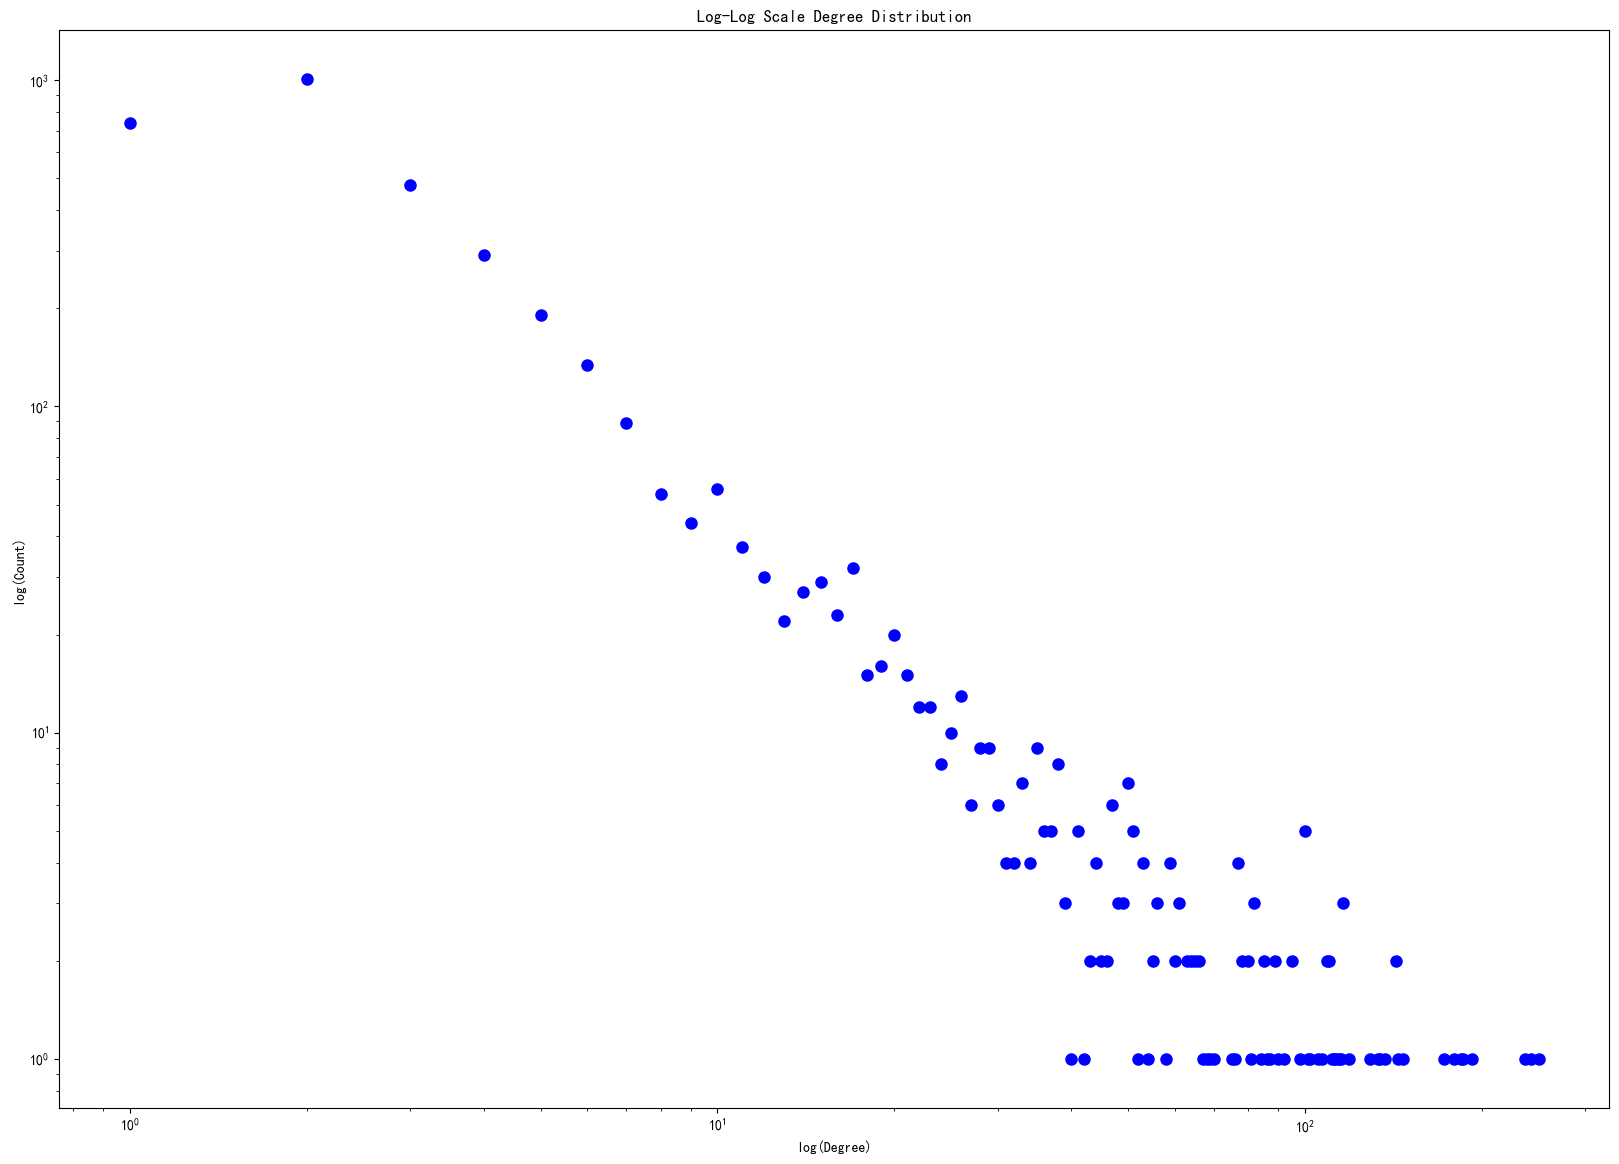

In [67]:
import matplotlib.pyplot as plt
import collections

degree_sequence = sorted([d for n, d in G.degree() if d > 0], reverse=True)
degree_count = collections.Counter(degree_sequence)

deg = list(degree_count.keys())
cnt = list(degree_count.values())

fig, ax = plt.subplots(figsize=(20, 14))
ax.bar(deg, cnt, width=0.80, color='b')
ax.set_title("Degree Distribution")
ax.set_ylabel("Count")
ax.set_xlabel("Degree")

ticks = [1]
current = 5
while current <= 250:
    ticks.append(current)
    current += 5
ax.set_xticks(ticks)
ax.set_xticklabels([str(d) for d in ticks])
ax.set_xlim(0, 250)

fig, ax_log = plt.subplots(figsize=(20, 14))
ax_log.plot(deg, cnt, 'bo', markersize=8)
ax_log.set_xscale('log')
ax_log.set_yscale('log')
ax_log.set_title("Log-Log Scale Degree Distribution")
ax_log.set_ylabel("log(Count)")
ax_log.set_xlabel("log(Degree)")

plt.show()


### Q5

In [73]:
start_node = next(iter(largest_subgraph.nodes()))
distances = nx.single_source_shortest_path_length(largest_subgraph, start_node)

farthest_node = max(distances, key=distances.get)

distances_from_A = nx.single_source_shortest_path_length(largest_subgraph, farthest_node)
approx_diameter = max(distances_from_A.values())

farthest_target = None
for target, d in distances_from_A.items():
    if d == approx_diameter:
        farthest_target = target
        break

longest_path = nx.shortest_path(largest_subgraph, source=farthest_node, target=farthest_target)

print("Unweighted diameter:", approx_diameter)
print("Longest shortest path (length", approx_diameter, "):")
print(" -> ".join(longest_path))


Unweighted diameter: 17
Longest shortest path (length 17 ):
Wasu -> Yalumet -> Derim -> Satwag -> Kabwum -> Konge -> Indagen -> Lae -> Port Moresby -> Brisbane -> Auckland -> Buenos Aires -> Santiago (CL) -> Concepcion (CL) -> Punta Arenas -> Mount Pleasant -> Georgetown (XV) -> Brize Norton


### Q6

In [74]:


path_cbr_cpt = nx.shortest_path(G, source="Canberra", target="Cape Town")

num_flights = len(path_cbr_cpt) - 1

print("the smallest number of flights from Canberra to Cape Town:", num_flights)
print("Airports along the way")
print(" -> ".join(path_cbr_cpt))


the smallest number of flights from Canberra to Cape Town: 3
Airports along the way
Canberra -> Melbourne (AU) -> Mauritius -> Cape Town


### Q7

In [75]:
import networkx as nx

betweenness = nx.betweenness_centrality(G)

top_10_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 cities/airports with the highest betweenness centrality:")
for city, bc_value in top_10_betweenness:
    print(f"Betweenness centrality of {city} = {bc_value}")


Top 10 cities/airports with the highest betweenness centrality:
Betweenness centrality of Paris = 0.09342038060218977
Betweenness centrality of London (GB) = 0.08498898419090654
Betweenness centrality of Anchorage = 0.08152332552856367
Betweenness centrality of Singapore = 0.07536240446228736
Betweenness centrality of New York = 0.069283490858716
Betweenness centrality of Los Angeles (US) = 0.0662498793618225
Betweenness centrality of Frankfurt = 0.06557771120844043
Betweenness centrality of Port Moresby = 0.06432333262687222
Betweenness centrality of Tokyo = 0.06024259549977448
Betweenness centrality of Seattle = 0.05237856856490342
